# Module Title:	Strategic Thinking
### Assessment Title: Strategic Thinking Project
### Lecturer Name: James Garza
### Student Full Name & Number:	Ayllin Bukovic 2023003| Heitor Gomes de Araújo Filho 2023098 | Leandro Boniek Costa Calixto 2023102

# Table of Contents

## EDA

The dataset spg.csv can be found on Kaggle, an authentic resource repository, and has 4981 observations and 11 attributes.

In [1]:
#for data analysis
import numpy as np
from numpy import array
from numpy import argmax
import pandas as pd

#for visualistions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(palette='Paired')

#for data preprocessing and preperation 
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#for defining models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#for model evaluation
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter("ignore")

In [2]:
# loading the data into dataframe.
df = pd.read_csv('brain_stroke.csv')

In [3]:
df = df.rename(columns={"gender": "Gender", "age": "Age", "hypertension": "Hypertension", "heart_disease": "Heart Disease", "ever_married": "Civil Status","work_type": "Type of work", "Residence_type": "Residence", "avg_glucose_level": "Glucose Level", "bmi": "Body Mass Index", "smoking_status": "Smoking", "stroke": "Stroke" })

In [4]:
#create data dictionary including variable name and data types
data_dict = pd.DataFrame({'Variable': df.columns, 'Data Type': [df[col].dtype for col in df.columns]})

#write variable descriptions
data_dict['Description'] = [
    'Gender of patient\nFemale, Male', 
    'Age of patient (years)', 
    '0 = does not have hypertention\n1 = has hypertension',
    '0 = does not have hear disease\n1 = has heart disease',
    'Marriage History\nYes(been or is married)\nNo(never married)',
    'Type of Work-\nPrivate: work for private firm\nSelf-employed\nGovt_job: work for government\nchildren: is a child (no work)',
    'Type of Residence Area\nUrban, Rural',
    'Average Glucose Level of patient (mg/dL)',
    'Body Mass Index',
    'Smoking Status of patient\nSmokes, Unknown, Former Smoker, Never Smoked',
    'Stroke History\n0 = has not had a stroke\n1 = has had a stroke'
]

#increase column width so that all texts show
data_dict = data_dict.style.set_properties(subset=['Description'], **{'width': '600px'}) 
data_dict #display dataframe

,Variable,Data Type,Description
0,Gender,object,"Gender of patient Female, Male"
1,Age,float64,Age of patient (years)
2,Hypertension,int64,0 = does not have hypertention 1 = has hypertension
3,Heart Disease,int64,0 = does not have hear disease 1 = has heart disease
4,Civil Status,object,Marriage History Yes(been or is married) No(never married)
5,Type of work,object,Type of Work- Private: work for private firm Self-employed Govt_job: work for government children: is a child (no work)
6,Residence,object,"Type of Residence Area Urban, Rural"
7,Glucose Level,float64,Average Glucose Level of patient (mg/dL)
8,Body Mass Index,float64,Body Mass Index
9,Smoking,object,"Smoking Status of patient Smokes, Unknown, Former Smoker, Never Smoked"


In [5]:
df.head()

,Gender,Age,Hypertension,Heart Disease,Civil Status,Type of work,Residence,Glucose Level,Body Mass Index,Smoking,Stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
df.shape
print('The dataset original shape: ', df.shape) 

The dataset original shape:  (4981, 11)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4981 non-null   object 
 1   Age              4981 non-null   float64
 2   Hypertension     4981 non-null   int64  
 3   Heart Disease    4981 non-null   int64  
 4   Civil Status     4981 non-null   object 
 5   Type of work     4981 non-null   object 
 6   Residence        4981 non-null   object 
 7   Glucose Level    4981 non-null   float64
 8   Body Mass Index  4981 non-null   float64
 9   Smoking          4981 non-null   object 
 10  Stroke           4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [8]:
df.isna().sum()

Gender             0
Age                0
Hypertension       0
Heart Disease      0
Civil Status       0
Type of work       0
Residence          0
Glucose Level      0
Body Mass Index    0
Smoking            0
Stroke             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Age,Hypertension,Heart Disease,Glucose Level,Body Mass Index,Stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [11]:
df.describe(include=['object'])

,Gender,Civil Status,Type of work,Residence,Smoking
count,4981,4981,4981,4981,4981
unique,2,2,4,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2907,3280,2860,2532,1838


In [12]:
#make list of all numerical columns
num_cols = df.select_dtypes(include ='float').keys()
num_cols

Index(['Age', 'Glucose Level', 'Body Mass Index'], dtype='object')

In [13]:
#make list of categorical columns with the object datatype
cat_cols_object = df.select_dtypes(include ='object' or 'int64').keys()
cat_cols_object

Index(['Gender', 'Civil Status', 'Type of work', 'Residence', 'Smoking'], dtype='object')

In [14]:
#make list of categorical columns with the integer datatype
cat_cols_binary = df.select_dtypes(include = 'int64').keys()
cat_cols_binary

Index(['Hypertension', 'Heart Disease', 'Stroke'], dtype='object')

In [15]:
#make list of all categorical columns
cat_variables = cat_cols_object.append(cat_cols_binary)
cat_variables

Index(['Gender', 'Civil Status', 'Type of work', 'Residence', 'Smoking',
       'Hypertension', 'Heart Disease', 'Stroke'],
      dtype='object')

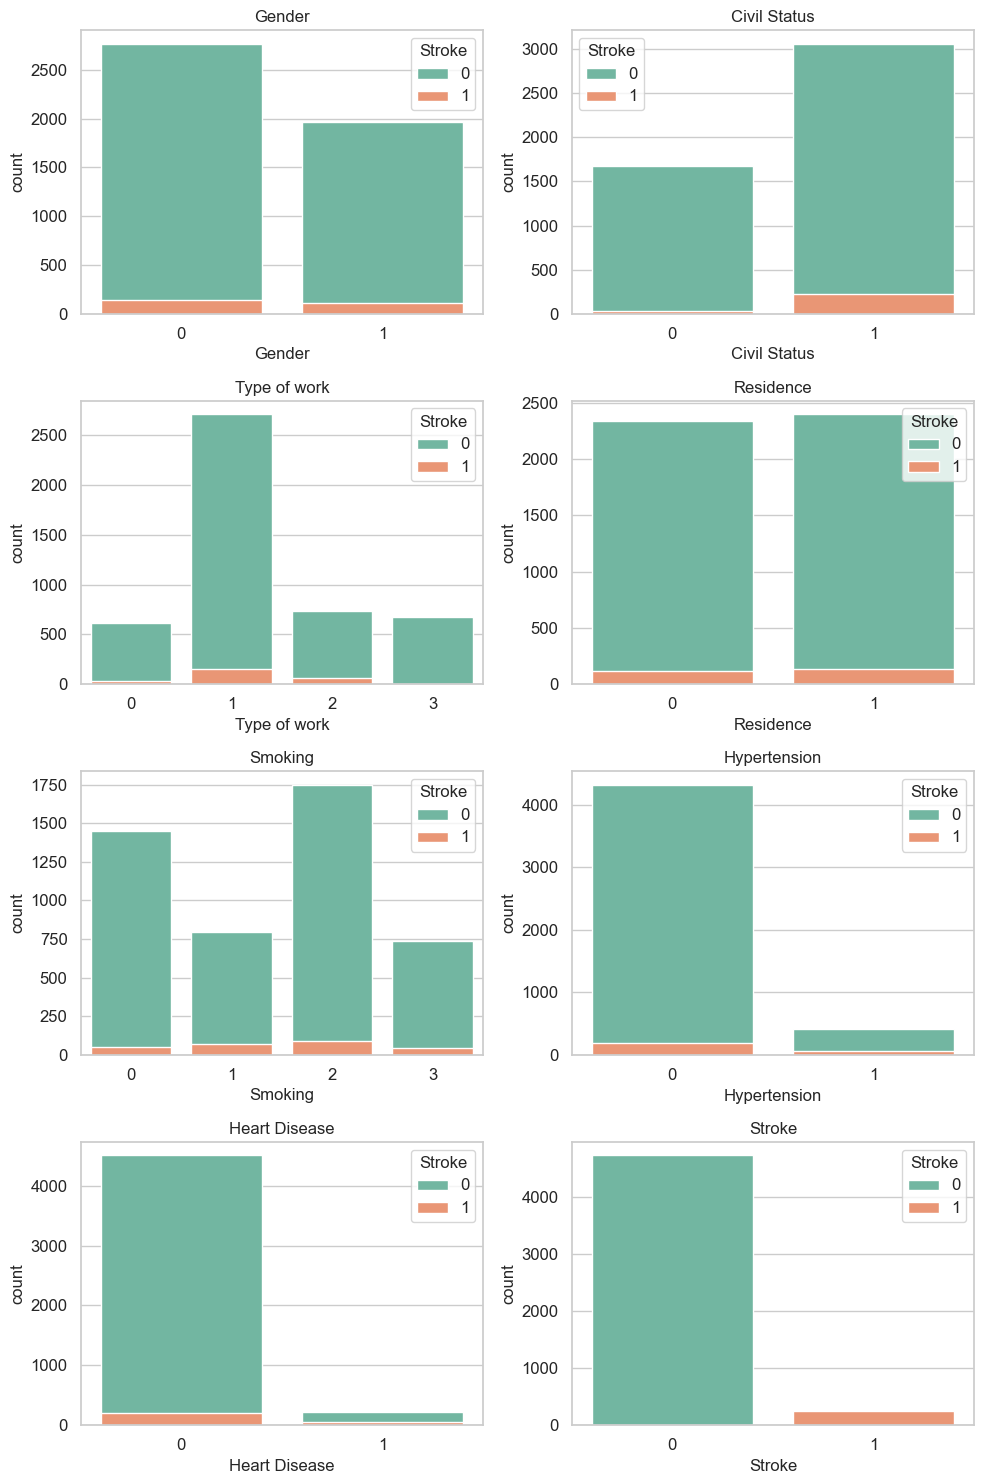

In [65]:
# Define the font size
font_size = 12

# Define the 'Icefire' color palette
custom_palette = sns.color_palette("Set2")

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))  # Define subplot parameters
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate over

# Set the style
sns.set(style="whitegrid")

# Iterate over each categorical column of the dataframe, creating a subplot
for i, col in enumerate(df[cat_variables]):
    sns.countplot(x=col, hue='Stroke', data=df, ax=axes[i], dodge=False, palette=custom_palette)

    # Set the title and font size
    axes[i].set_title(col, fontsize=font_size)

    # Set the label font size for the x and y axis
    axes[i].tick_params(axis='x', labelsize=font_size)
    axes[i].tick_params(axis='y', labelsize=font_size)

    # Set the legend font size
    legend = axes[i].get_legend()
    for text in legend.get_texts():
        text.set_fontsize(font_size)

plt.tight_layout()  # Fix layout
plt.show()  # Display subplots

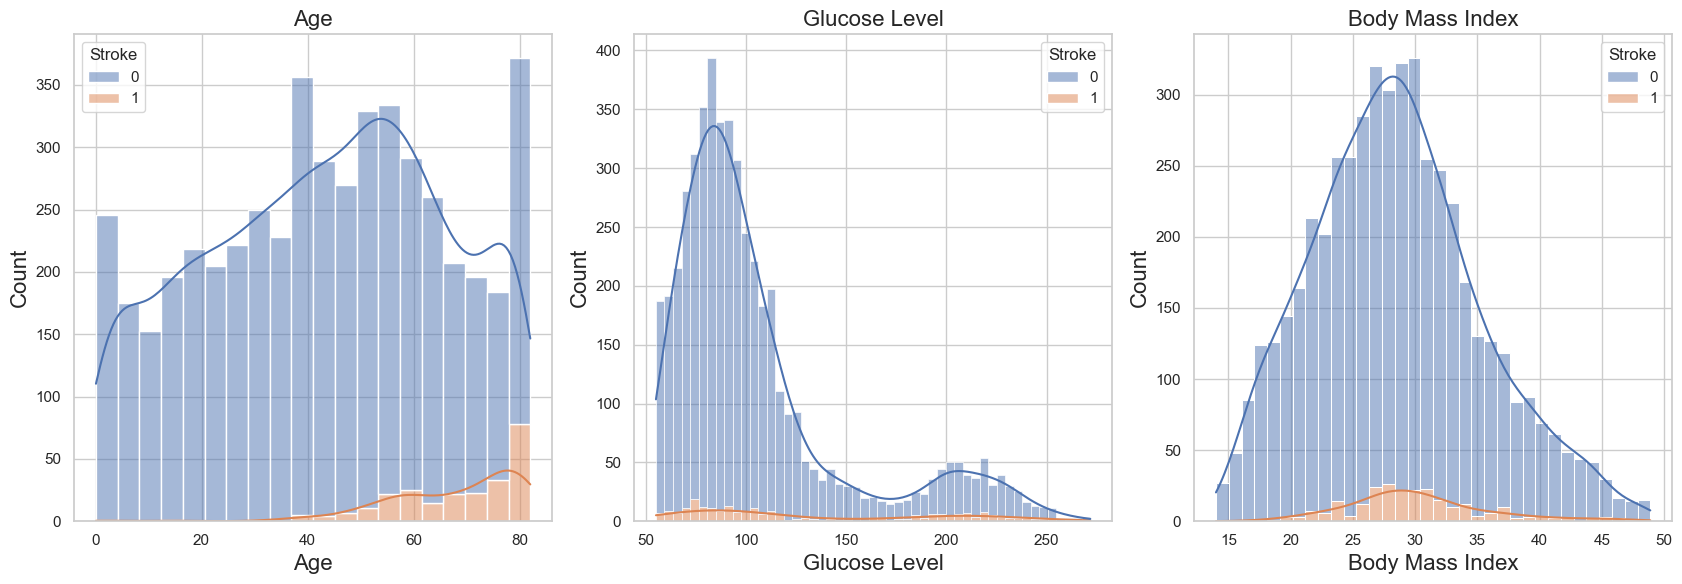

In [61]:
# Define the color palette as 'icefire'
sns.set_palette("Set2")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 6))  # Define subplot parameters
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate over

# Set the style
sns.set(style="whitegrid")

# Iterate over each numerical column of the dataframe, creating a subplot
for i, col in enumerate(df[num_cols]):
    sns.histplot(x=col, hue='Stroke', data=df, ax=axes[i], kde=True, multiple='stack')
    axes[i].set_title(col, fontsize=16)  # Set the title and font size

    # Set the label font size for the x and y axis
    axes[i].set_xlabel(col, fontsize=16)
    axes[i].set_ylabel('Count', fontsize=16)

plt.tight_layout()  # Fix layout
plt.show()  # Display subplots

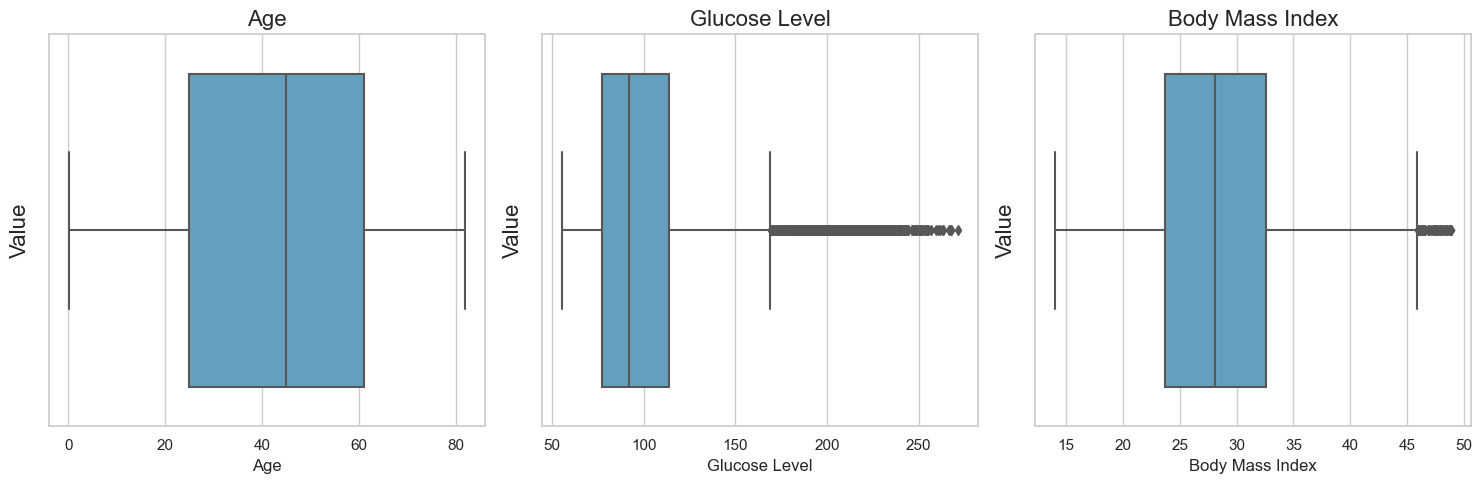

In [60]:
# Define the 'Icefire' color palette
sns.set_palette("Set2")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Define subplot parameters
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate over

# Set the style
sns.set(style="whitegrid")

# Iterate over each numerical column of the dataframe, creating a subplot
for i, col in enumerate(df[num_cols]):
    sns.boxplot(x=col, data=df, ax=axes[i], palette=sns.color_palette('icefire'))

    # Set the title and font size
    axes[i].set_title(col, fontsize=16)

    # Set the label font size for the y-axis
    axes[i].set_ylabel('Value', fontsize=16)

plt.tight_layout()  # Fix layout
plt.show()  # Display subplots

In [19]:
def check_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1 - 1.5*IQR))|(df>(q3 + 1.5*IQR)))]
    return outliers

# Print the number of the outliers in the 3 cols:
for i in range(0, len(num_cols)):
    print(f'The number of the outliers of the {num_cols[i]} column is : {len(check_outliers(df[num_cols[i]]))}')

The number of the outliers of the Age column is : 0
The number of the outliers of the Glucose Level column is : 602
The number of the outliers of the Body Mass Index column is : 43


In [20]:
df_skew = df.skew(axis=0) 
df_skew.sort_values(ascending=False) 

Stroke             4.140942
Heart Disease      3.896191
Hypertension       2.740377
Glucose Level      1.587526
Body Mass Index    0.371553
Age               -0.144001
dtype: float64

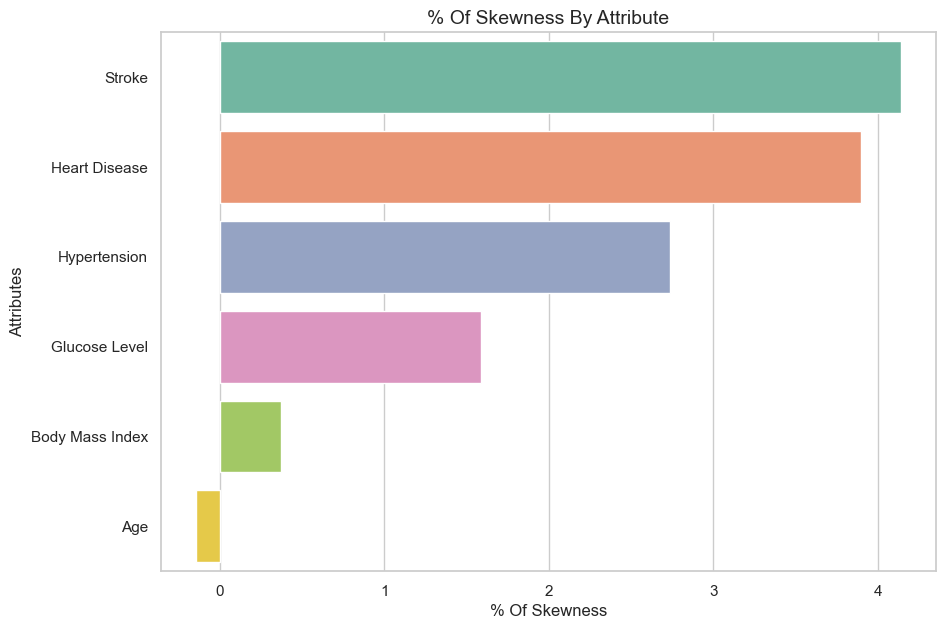

In [59]:
# Define the 'Icefire' color palette
sns.set_palette("Set2")

# Sort the skew values in descending order
df_skew_sorted = df_skew.sort_values(ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=df_skew_sorted.values, y=df_skew_sorted.index, orient="h")

# Customize the plot
plt.title("% Of Skewness By Attribute", fontsize=14)
plt.xlabel("% Of Skewness", fontsize=12)
plt.ylabel("Attributes", fontsize=12)

# Rotate the y-axis labels for better readability
plt.xticks(rotation=0)

plt.show()

## Data Preprocessing

In [22]:
l1=LabelEncoder()
df["Gender"]=l1.fit_transform(df["Gender"])
df["Civil Status"]=l1.fit_transform(df["Civil Status"])
df["Type of work"]=l1.fit_transform(df["Type of work"])
df["Residence"]=l1.fit_transform(df["Residence"])
df["Smoking"]=l1.fit_transform(df["Smoking"])

In [23]:
df.head()

,Gender,Age,Hypertension,Heart Disease,Civil Status,Type of work,Residence,Glucose Level,Body Mass Index,Smoking,Stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4981 non-null   int32  
 1   Age              4981 non-null   float64
 2   Hypertension     4981 non-null   int64  
 3   Heart Disease    4981 non-null   int64  
 4   Civil Status     4981 non-null   int32  
 5   Type of work     4981 non-null   int32  
 6   Residence        4981 non-null   int32  
 7   Glucose Level    4981 non-null   float64
 8   Body Mass Index  4981 non-null   float64
 9   Smoking          4981 non-null   int32  
 10  Stroke           4981 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 330.9 KB


## Correlation among variables

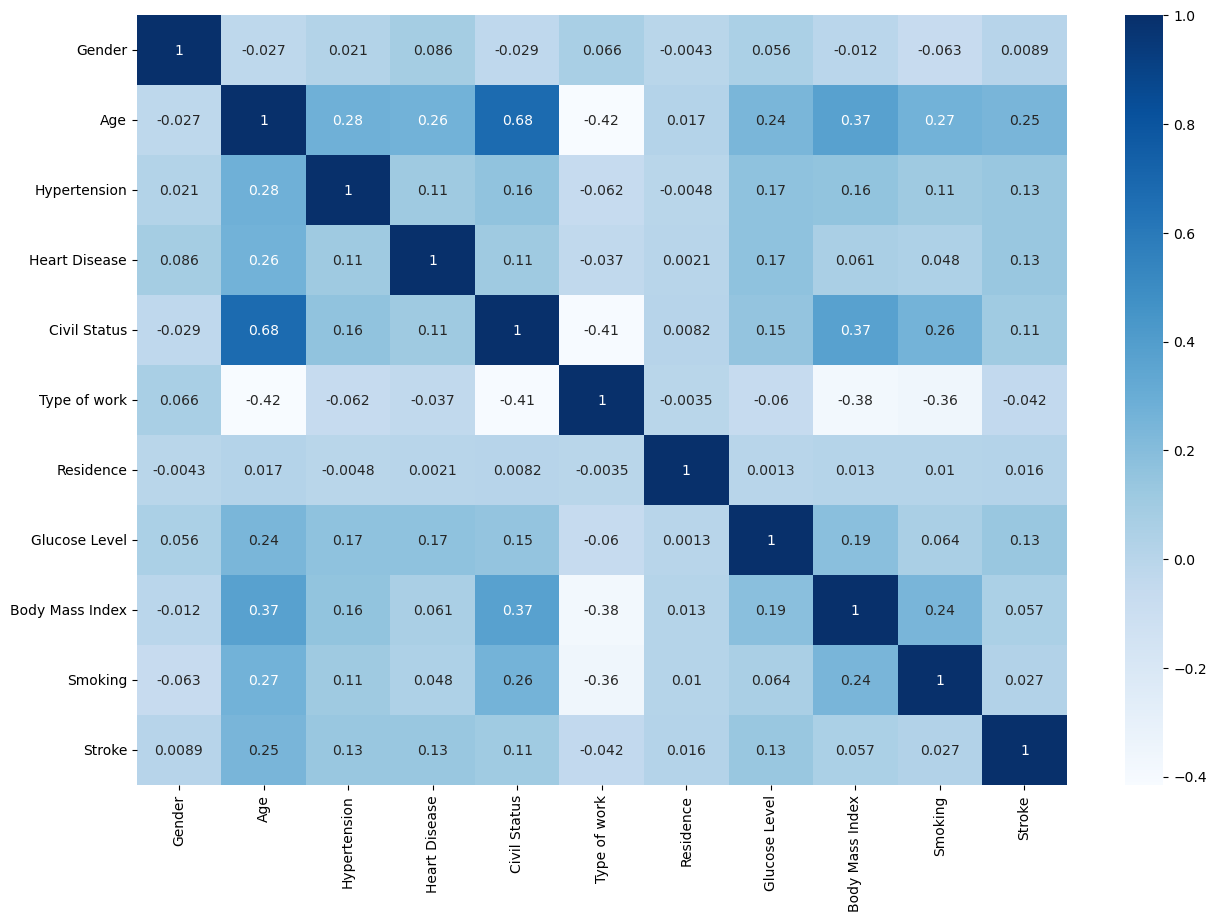

In [25]:
plt.figure(figsize=(15,10))
corr_table = df.corr()
sns.heatmap(corr_table ,cmap="Blues",annot=True);

In [26]:
#correlations of variables with target variable 
df.corr()[['Stroke']].sort_values(by='Stroke', ascending=False)

,Stroke
Stroke,1.000000
Age,0.246478
Heart Disease,0.134610
Glucose Level,0.133227
Hypertension,0.131965
Civil Status,0.108398
Body Mass Index,0.056926
Smoking,0.027463
Residence,0.016494
Gender,0.008870


## The most relevant correlations (> 0.6)

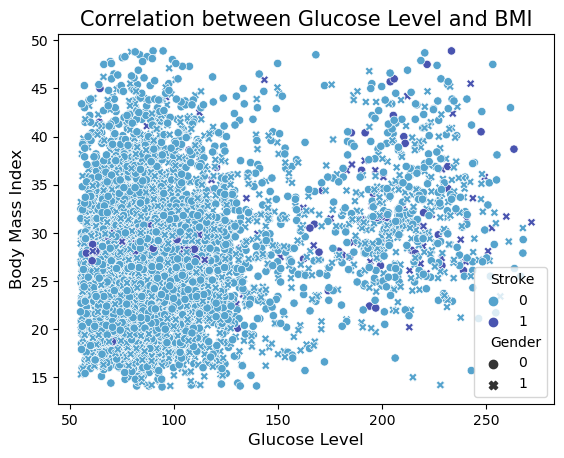

In [27]:
sns.scatterplot(data=df, x="Glucose Level", y="Body Mass Index", hue="Stroke", style="Gender")
plt.xlabel("Glucose Level", fontsize = 12)
plt.ylabel("Body Mass Index", fontsize = 12)
plt.title("Correlation between Glucose Level and BMI", fontsize = 15);

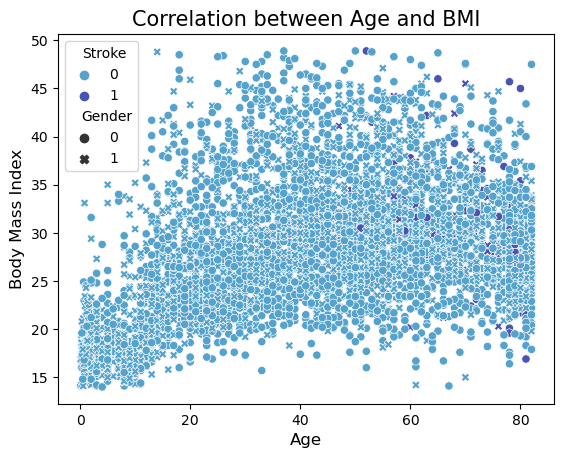

In [28]:
sns.scatterplot(data=df, x="Age", y="Body Mass Index", hue="Stroke", style="Gender")
plt.xlabel("Age", fontsize = 12)
plt.ylabel("Body Mass Index", fontsize = 12)
plt.title("Correlation between Age and BMI", fontsize = 15);

## Handling Imbalanced Data

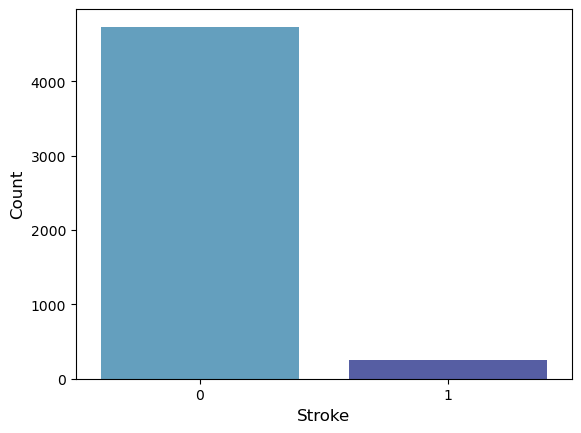

<Figure size 600x200 with 0 Axes>

In [29]:
sns.countplot(x="Stroke", data=df)
plt.xlabel("Stroke", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.figure(figsize=(6,2))
plt.show()

In [30]:
df_stroke = pd.DataFrame(df)

In [31]:
# split the dataset into features (X) and target variable (y)
X = df_stroke.drop('Stroke',axis=1)
y = df_stroke['Stroke']

In [32]:
# Feature Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [33]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3984, 10), (997, 10), (3984,), (997,))

In [34]:
# apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# print the shape of the balanced dataset
print("Shape of balanced dataset:", X_res.shape, y_res.shape)

Shape of balanced dataset: (9466, 10) (9466,)


In [36]:
# Print the shape of training and testing data along with its labels.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7572, 10), (1894, 10), (7572,), (1894,))

## Random Forest

In [37]:
# create a RandomForestClassifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model on the training set
rf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rf.predict(X_test)

# calculate the accuracy of the model
accuracy = rf.score(X_test, y_test)

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(cf_matrix)
print(classification_report(y_test, y_pred))

Accuracy: 0.9535374868004224
[[903  43]
 [ 45 903]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       946
           1       0.95      0.95      0.95       948

    accuracy                           0.95      1894
   macro avg       0.95      0.95      0.95      1894
weighted avg       0.95      0.95      0.95      1894



In [38]:
# Calculate training accuracy
train_accuracy = accuracy_score(y_train, rf.predict(X_train))

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, rf.predict(X_test))

print (train_accuracy)
print (test_accuracy)

1.0
0.9535374868004224


## Working with K fold Cross Validation score (Random Forest Classifier)

In [39]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=11)
kf.get_n_splits(X)

5

In [40]:
#knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(RandomForestClassifier(), X_train, y_train, scoring = 'f1', cv = kf)
print(scores, scores.mean())

[0.962818   0.95454545 0.94944189 0.94661458 0.93700787] 0.9500855613626052


In [41]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = kf, n_jobs = -1,verbose = 1, scoring='f1')

In [42]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
#Fitting the final model with the best parameters obtained from grid search
## model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=None,
                             min_samples_leaf=1, 
                             min_samples_split=2,
                             max_features='auto',
                             n_estimators=150)

In [ ]:
# fit
rfc.fit(X_train,y_train)

In [ ]:
# predict
predictions = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(f"Accuracy: {accuracy}")

In [ ]:
# Calculate training accuracy
train_accuracy = accuracy_score(y_train, rfc.predict(X_train))

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, rfc.predict(X_test))

print (train_accuracy)
print (test_accuracy)

## Logistic Regression

In [ ]:
# create a Logistic Regression object
lr = LogisticRegression(random_state=42)

# train the model on the training set
lr.fit(X_train, y_train)

# make predictions on the testing set
y_pred = lr.predict(X_test)

# calculate the accuracy of the model
accuracy = lr.score(X_test, y_test)
print(f"Accuracy: {accuracy}")
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
print(classification_report(y_test, y_pred))

In [ ]:
# Calculate training accuracy
train_accuracy = accuracy_score(y_train, lr.predict(X_train))

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, lr.predict(X_test))

print (train_accuracy)
print (test_accuracy)

## KNeighbors Classifier

In [ ]:
# create a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=5)

# train the model on the training set
knn.fit(X_train, y_train)

# make predictions on the testing set
y_pred = knn.predict(X_test)

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
print(classification_report(y_test, y_pred))

# calculate the accuracy of the model
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

In [ ]:
# Calculate training accuracy
train_accuracy = accuracy_score(y_train, knn.predict(X_train))

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, knn.predict(X_test))

print (train_accuracy)
print (test_accuracy)

## Working with K fold Cross Validation score (KNN Classifier)

In [ ]:
scores = cross_val_score(knn, X_train, y_train, scoring = 'f1', cv = kf)
print(scores, scores.mean())

In [ ]:
# Create the parameter grid based on the results of random search 
param_gridkn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
# Instantiate the grid search model
grid_search_kn = GridSearchCV(estimator = knn, param_grid = param_gridkn, 
                           cv = kf, n_jobs = -1, verbose = 1, scoring='f1')

In [ ]:
grid_search_kn.fit(X_train, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_kn.best_score_,'using',grid_search_kn.best_params_)


In [ ]:
#Fitting the model with the best hyperparameters
# model with the best hyperparameters
Knnmodel = KNeighborsClassifier(n_neighbors= 5,
                                p= 1,
                                weights= 'distance')

In [ ]:
#fit
Knnmodel.fit(X_train, y_train)

In [ ]:
#predict
y_pred_kn = Knnmodel.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_kn))
print(confusion_matrix(y_test,y_pred_kn))
print(f"Accuracy: {accuracy}")

In [ ]:
# Calculate training accuracy
train_accuracy = accuracy_score(y_train, Knnmodel.predict(X_train))

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, Knnmodel.predict(X_test))

print (train_accuracy)
print (test_accuracy)

## DecisionTree Classifier

In [ ]:
# create a DecisionTreeClassifier object
dtc = DecisionTreeClassifier(random_state=42)

# train the model on the training set
dtc.fit(X_train, y_train)

# make predictions on the testing set
y_pred = dtc.predict(X_test)

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
print(classification_report(y_test, y_pred))

# calculate the accuracy of the model
accuracy = dtc.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

## Working with K fold Cross Validation score (Decision Tree Classifier)

In [ ]:
scores = cross_val_score(dtc, X_train, y_train, scoring = 'f1', cv = kf)
print(scores, scores.mean())

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
# Instantiate the grid search model
grid_search_dtc = GridSearchCV(estimator = dtc, param_grid = param_gridkn, 
                           cv = kf, n_jobs = -1, verbose = 1, scoring='f1')

In [ ]:
grid_search_dtc.fit(X_train, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_dtc.best_score_,'using',grid_search_dtc.best_params_)

In [ ]:
#Fitting the model with the best hyperparameters
# model with the best hyperparameters
dtcmodel = DecisionTreeClassifier(n_neighbors= 5,
                                  p= 1,
                                  weights= 'distance')

In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='f1')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best F1 score
print("Best parameters: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

## Plotting Graph for Analysis 

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title('Random Forest Classifier')
plt.scatter(predictions,y_test)
plt.xlabel('y predicted randomforest\n R2 Score: {}'.format(r2_score(y_test, predictions)))
plt.ylabel('y_test')
plt.subplot(1,2,2)
plt.title('KNeighbors Classifier')
plt.scatter(y_pred_kn,y_test)
plt.xlabel('y predicted KNeighbors \n R2 Score: {}'.format(r2_score(y_test, y_pred_kn)))
plt.ylabel('y_test')

## Cross Validation

In [ ]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [ ]:
# Calculate the mean values and Standard deviation
get_cv_scores(rf)

# CV Mean is 0.75, means that the model correctly classifies 75.80% of the test data and 
#the standard deviation of 2.5% indicates that the accuracy of the model can vary by approximately +/-2.5% around the mean in new samples of test data.